### Vinicius Jovito - Bootcamp Ciência de Dados

#Trabalhando com Planilhas do Excel

In [1]:
#Antes de rodar os comandos, carregas os arquivos .xlsx dos 5 estados.

In [2]:
#Importando a biblioteca pandas
import pandas as pd

In [3]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [4]:
#Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [5]:
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [6]:
#Exibindo as 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [7]:
#Verificando o tipo dos dados da coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [8]:
df.sample()

,Cidade,Data,Vendas,LojaID,Qtde
27,Aracaju,2018-01-01,3.39,1523,4


In [9]:
#Alterando o tipo de dado da colina LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [10]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

Tratando os valores faltantes

In [11]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [12]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [13]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [14]:
#Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [15]:
#Apagando as linhas com valores nulos com base apenas em uma coluna
df.dropna(how="all", inplace=True)

In [16]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

Criando colunas novas

In [17]:
#Criando uma coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [18]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [19]:
#Retornando o maior valor de receita
df["Receita"].max()

3544.0

In [20]:
#Retornando o menor valor de receita
df["Receita"].min()

3.34

In [21]:
#Método nlargest() retorna as linha com os valores maiores de acordo com a coluna de paramêtro.
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [22]:
#Método nsmallest() retorna as linha com os valores menores de acordo com a coluna de paramêtro.
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [23]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [24]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


#Trabalhando com Datas

In [26]:
#Tranformando a coluna de data em tipo inteiro, para mostrar na prática como deve ser realizado o processo de formatar as datas.
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [27]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [28]:
#Transformando a coluna de data em data.
df["Data"] = pd.to_datetime(df["Data"])

In [29]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [30]:
#Agrupamento por ano.
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [31]:
#Criando uma coluna de ano.
df["Ano_Venda"] = df['Data'].dt.year

In [32]:
df


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018
...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019


In [33]:
#Criando Coluna de mês e dia separadamentes.
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month , df["Data"].dt.day)

In [34]:
df


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1
...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019,1,3
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,1,3
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3


In [35]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [36]:
#Retornando a data mais recente
df["Data"].max()

Timestamp('2019-04-05 00:00:00')

In [37]:
#Calculando a diferença de tempo de dias.
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [38]:
df


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1,0 days
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1,0 days
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1,0 days
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1,0 days
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1,0 days
...,...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3,367 days
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019,1,3,367 days
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,1,3,367 days
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3,367 days


In [41]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias
140,Natal,2019-01-02,20.79,1036,2,41.58,2019,1,2,366 days
138,Natal,2019-01-02,212.03,1037,3,636.09,2019,1,2,366 days
171,Natal,2019-01-02,136.45,1035,3,409.35,2019,1,2,366 days
66,Natal,2019-03-24,559.00,853,2,1118.00,2019,3,24,447 days
50,Natal,2019-03-08,324.00,854,4,1296.00,2019,3,8,431 days


In [42]:
#Criando uma coluna de trimestre.
df["trimestre_venda"] = df["Data"].dt.quarter

In [43]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias,trimestre_venda
4,Natal,2019-03-09,699.00,853,3,2097.00,2019,3,9,432 days,1
12,Natal,2019-02-02,709.00,853,3,2127.00,2019,2,2,397 days,1
10,Natal,2018-10-27,828.00,852,4,3312.00,2018,10,27,299 days,4
148,Natal,2019-01-02,40.59,1037,3,121.77,2019,1,2,366 days,1
62,Salvador,2019-01-01,161.02,1037,3,483.06,2019,1,1,365 days,1


In [44]:
#Filtrando as vendas de 2019 do mês de março.
venda_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [45]:
venda_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


#Trabalhando com Visualização

In [46]:
#Fazendo a contagem de linhas por ID para descobrir quais lojas venderam mais.
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

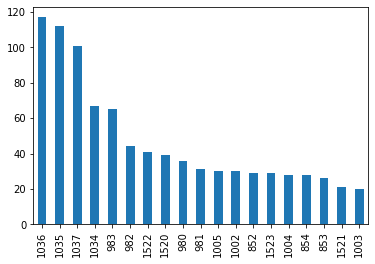

In [49]:
#Criando um gráfico de barras verticais.
df["LojaID"].value_counts(ascending=False).plot.bar()

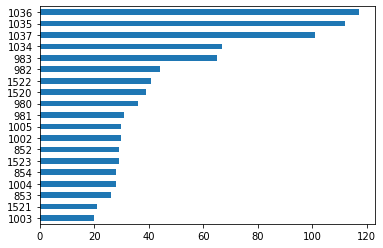

In [52]:
#Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh()

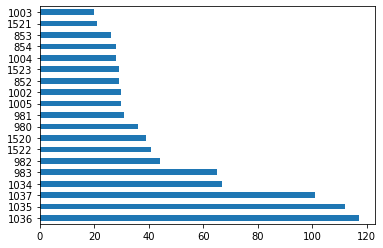

In [53]:
#Gráfico de barras horizontais
df["LojaID"].value_counts().plot.barh();

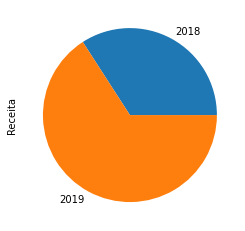

In [54]:
#Gráfico de Pizza.
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [55]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

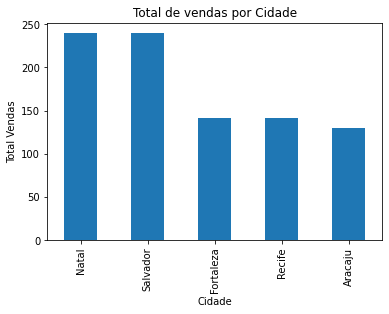

In [57]:
#Adicionando um título e alterando nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

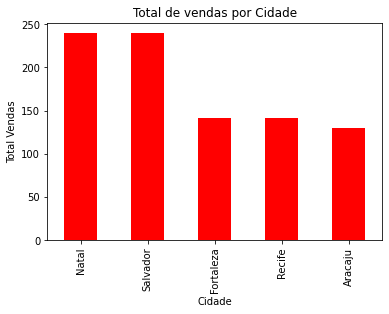

In [58]:
#Mudando a cor do gráfico
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [59]:
#Alterando o estilo do gráfico.
plt.style.use("ggplot")

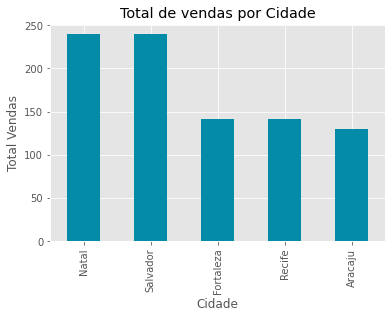

In [61]:
#Mudando a cor do gráfico
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por Cidade", color="#048BA8")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

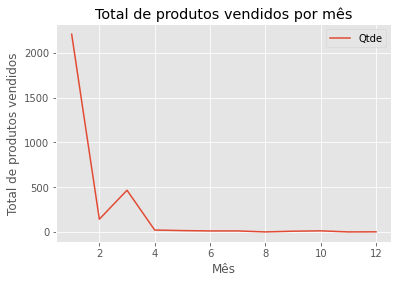

In [66]:
df.groupby(df["Mes_Venda"])['Qtde'].sum().plot(title = "Total de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();


In [67]:
#Selecionando apenas as vendas de 2019.
df_2019 = df[df["Ano_Venda"]==2019]

In [68]:
df_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias,trimestre_venda
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,2019,1,1,365 days,1
8,Aracaju,2019-01-01,12.16,1523,1,12.16,2019,1,1,365 days,1
9,Aracaju,2019-01-01,149.36,1523,3,448.08,2019,1,1,365 days,1
10,Aracaju,2019-01-01,42.34,1522,6,254.04,2019,1,1,365 days,1
11,Aracaju,2019-01-01,161.53,1520,4,646.12,2019,1,1,365 days,1
...,...,...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3,367 days,1
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019,1,3,367 days,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,1,3,367 days,1
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3,367 days,1


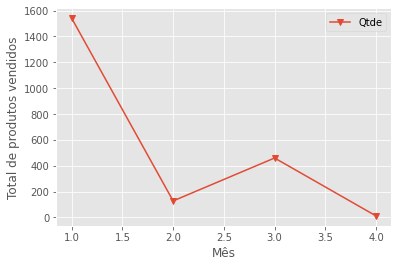

In [69]:
df_2019.groupby(df_2019["Mes_Venda"])['Qtde'].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();

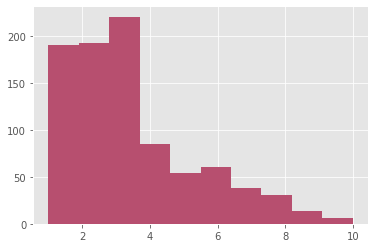

In [76]:
#Histograma
plt.hist(df["Qtde"], color = "#B74F6F");

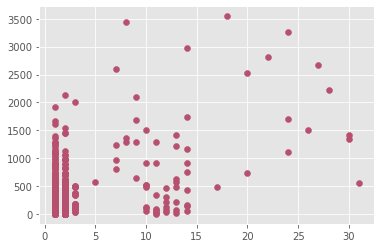

In [81]:
plt.scatter(x=df_2019["Dia_Venda"], y=df_2019["Receita"], color = "#B74F6F");

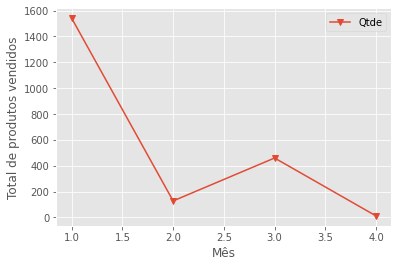

In [82]:
#Salvando em png
df_2019.groupby(df_2019["Mes_Venda"])['Qtde'].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend()
plt.savefig("Produtos vendidos x mes.png")